**Ways to Detect and Remove the Outliers**

While working on a Data Science project, what is it, that you look for? What is the most important part of the EDA phase? There are certain things which, if are not done in the EDA phase, can affect further statistical/Machine Learning modelling. One of them is finding “Outliers”. In this post we will try to understand what is an outlier? Why is it important to identify the outliers? What are the methods to outliers? Don’t worry, we won’t just go through the theory part but we will do some coding and plotting of the data too.
Meet the Outlier


   ** In statistics, an outlier is an observation point that is distant from other observations.**

**Data Collection & Outliers**

As we now know what is an outlier, but, are you also wondering how did an outlier introduce to the population?

The Data Science project starts with collection of data and that’s when outliers first introduced to the population. Though, you will not know about the outliers at all in the collection phase. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.

Now that we know outliers can either be a mistake or just variance, how would you decide if they are important or not. Well, it is pretty simple if they are the result of a mistake, then we can ignore them, but if it is just a variance in the data we would need think a bit further. Before we try to understand whether to ignore the outliers or not, we need to know the ways to identify them.

So, Let’s get start. We will be using Boston House Pricing Dataset which is included in the sklearn dataset API. We will load the dataset and separate out the features and targets.

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [0]:
#loding data
boston_df=load_boston()

#features and target

X=boston_df.data
y=boston_df.target

In [17]:
columns=boston_df.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [18]:
# to get the description of dataset form sklearn
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
#create datafrmae

df=pd.DataFrame(boston_df.data)
df.columns=columns
df_o=df
df.shape

    In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

Above definition suggests, that if there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. Let’s try and see it ourselves.

In [0]:
#outlier detection 
#Univarite Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

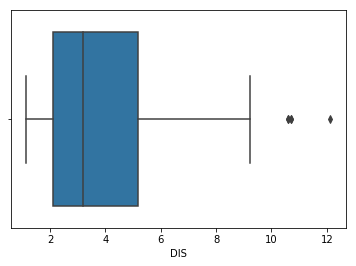

In [23]:
%matplotlib inline
sns.boxplot(x=df["DIS"])

Above plot shows three points between 10 to 12, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

   ** A scatter plot** , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

As the definition suggests, the scatter plot is the collection of points that shows values for two variables. We can try and draw scatter plot for two variables from our housing dataset.

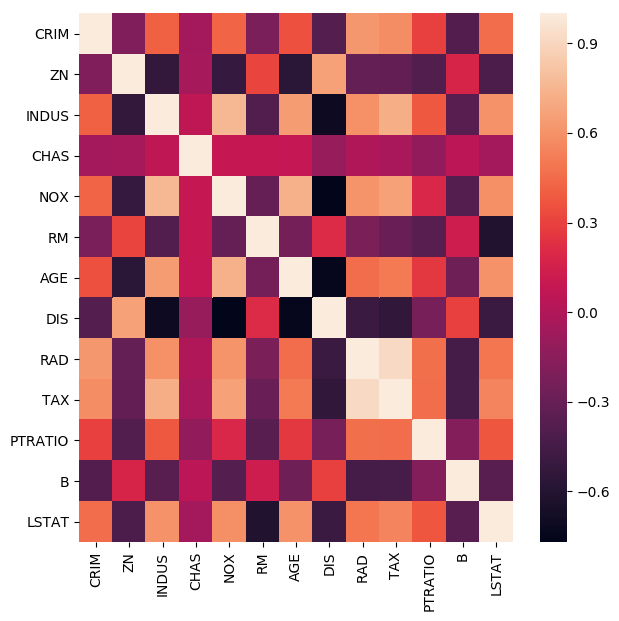

In [26]:
#lets check correlation between the features before multivariate outliers analysis

plt.figure(figsize=(7,7),dpi=100)
sns.heatmap(df.corr())

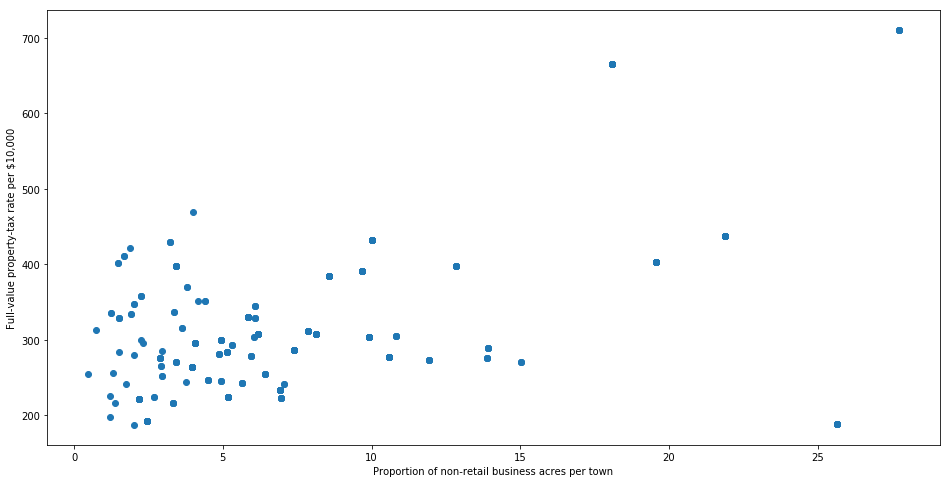

In [29]:
#multivariat outlier analysis

fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(df["INDUS"],df["TAX"])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

The above plot show there is some type of correlation between the two variables so when be plot the univariate we may thing we points as outliears as they are completly different from mostof the data points but using bivariate now we can see that values  are correlated to ither variables and they may be importantpoints than considering them as outliers.

**Discover outliers with mathematical function
Z-Score- **



    The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

We will use Z-score function defined in scipy library to detect the outliers.

In [30]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [31]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [32]:
#print(boston_df[np.where(z > 3)])
print(z[55][1])

3.375038763517309


In [0]:
#removing outliear bases on threhold

df_o=df_o[(z<3).all(axis=1)]

In [36]:
print(df_o.shape)
df.shape


(415, 13)


(506, 13)

**IQR score -**

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

Wikipedia Definition

    The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

    In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

    It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR, and then remove outliers.


In [38]:
df_o1 = df
Q1 = df_o1.quantile(0.25)
Q3 = df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

boston_df_out = df_o1[~((df_o1 < (Q1 - 1.5 * IQR)) |(df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [39]:
boston_df_out.shape

(274, 13)

There are many ways in removing the outliears.
You can find how to remove the outliers using CLustering [here](https://haridas.in/outlier-removal-clustering.html)

Can find nice explanation about DBSCAN [here](https://www.kdnuggets.com/2018/12/four-techniques-outlier-detection.html)


This will cover most of the techniques theorotically [here](https://www.digitalvidya.com/blog/outlier-detection/)


Happy Learn...